In [129]:
# Use the Azure Machine Learning data preparation package
from azureml.dataprep import package

# Use the Azure Machine Learning data collector to log various metrics
from azureml.logging import get_azureml_logger
logger = get_azureml_logger()


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [130]:
# Use Azure Machine Learning history magic to control history collection
# History is off by default, options are "on", "off", or "show"
# %azureml history on


In [131]:
# This call will load the referenced package and return a DataFrame.
# If run in a PySpark environment, this call returns a
# Spark DataFrame. If not, it returns a Pandas DataFrame.
features = package.run('dprep1.dprep', dataflow_idx=2)
submission_test_data = package.run('dprep1.dprep', dataflow_idx=3)

In [132]:
features.head(3)

,area_is_metro,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__pop_per_dentist,health__pop_per_primary_care_physician,is_yr_a,heart_disease_mortality_per_100k
0,True,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,...,0.297,0.230,0.131,0.089,0.332,13.0,1650.0,1489.0,True,312.0
1,True,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,...,0.288,0.190,0.090,0.082,0.265,10.0,2010.0,2480.0,True,257.0
2,True,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,...,0.212,0.156,0.084,0.098,0.209,10.0,629.0,690.0,False,195.0


In [133]:
submission_test_data.head(3)

,row_id,area_is_metro,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,...,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__pop_per_dentist,health__pop_per_primary_care_physician,is_yr_a
0,2.0,False,0.469,0.070,0.211,0.156,0.499,0.184,0.236,0.114,...,11.0,0.217,0.166,0.078,0.079,0.162,11.0,1569.0,1559.0,True
1,3.0,True,0.509,0.061,0.182,0.056,0.514,0.211,0.141,0.203,...,9.0,0.283,0.172,0.099,0.078,0.269,10.0,1709.0,1069.0,True
2,7.0,True,0.479,0.042,0.294,0.131,0.514,0.245,0.170,0.119,...,11.0,0.288,0.184,0.094,0.078,0.275,10.0,1789.0,1990.0,True


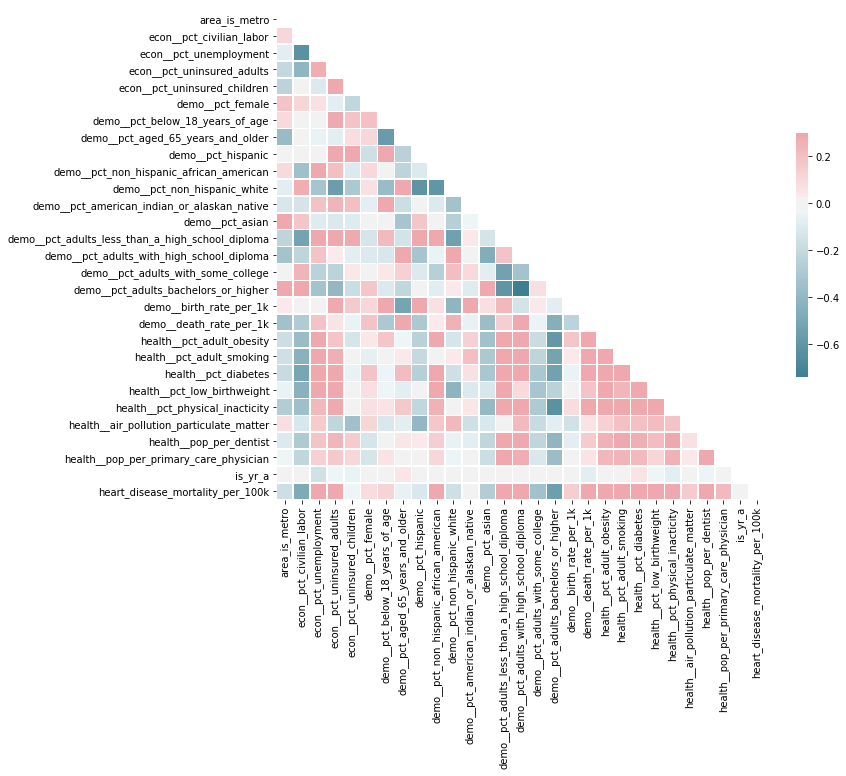

In [134]:
dff = features #[['health__pct_adult_smoking', 'health__pct_excessive_drinking', 'demo__death_rate_per_1k']]


# Compute the correlation matrix
corr = dff.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [135]:
# dealing with missing values
features = features.fillna(features.mean())
submission_test_data = submission_test_data.fillna(features.mean())

In [136]:
# Labels are the values we want to predict
labels = np.array(features['heart_disease_mortality_per_100k'])

# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('heart_disease_mortality_per_100k', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [137]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [124]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2398, 28)
Training Labels Shape: (2398,)
Testing Features Shape: (800, 28)
Testing Labels Shape: (800,)


In [141]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
lreg.fit(train_features, train_labels);
rf.fit(train_features, train_labels);

In [142]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Use the model's predict method on the test data
predictions = rf.predict(test_features)

rmse = sqrt(mean_squared_error(test_labels, predictions))

# Print out the rmse
print('RMSE Random Forest:', round(np.mean(rmse), 2))


predictions = lreg.predict(test_features)

rmse = sqrt(mean_squared_error(test_labels, predictions))

# Print out the rmse
print('RMSE Linear Regression:', round(np.mean(rmse), 2))

RMSE Random Forest: 31.73
RMSE Linear Regression: 34.38


In [127]:
# predict on the submission test data
row_ids = np.array(submission_test_data['row_id'])

submission_test_data = submission_test_data.drop('row_id', axis = 1)

submission_predictions = rf.predict(submission_test_data)

output = pd.DataFrame({'row_id': row_ids, 'heart_disease_mortality_per_100k': submission_predictions}).astype('int32')

In [128]:
output.astype('int32').to_csv('submission.csv', columns=['row_id','heart_disease_mortality_per_100k'], index=False)